
#### **Rossmann Store Sales Prediction**
##### The project aims to address a critical business challenge: predicting daily sales for Rossmann stores. The ability to accurately forecast sales is essential for inventory management, staffing, and promotional planning. By leveraging historical sales data and various store-related features, the project seeks to build a robust predictive model that can help Rossmann improve its operational efficiency and optimize sales.



### **1.Project Definition and Objectives**

**Primary Objective:** 

-  Predict daily sales for Rossmann stores using historical sales data and store-specific features.

**Secondary Objectives:**
- Understand the key factors influencing sales in retail stores.
- Develop a predictive model capable of accurately forecasting sales.
- Identify actionable insights to enhance sales performance based on model predictions.
- Project Hypothesis or Analytical Questions

**The project seeks to explore the following hypotheses or questions:**

- Key Factors: What are the most significant factors affecting daily sales in Rossmann stores?
- Model Accuracy: Can we develop a model that accurately predicts sales across various store types and conditions?
- Promotions Impact: How do promotions and competitive factors influence store sales?
- Seasonality: How do seasonal trends affect sales, and can they be effectively modeled?





**DataSets Summary**


**store.csv:**

Contains information about the stores, including store type, assortment type, competition distance, and promotional details.

- Total Records: 1,115
- Key Columns:
- Store: Store identifier.
- StoreType: Type of store.
- Assortment: Type of assortment.
- CompetitionDistance: Distance to nearest competitor.
- Promo2: Indicator of ongoing promotion.
- Missing Values: Some missing values in columns like CompetitionDistance, CompetitionOpenSinceMonth
CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, and PromoInterval.

**train.csv:** 

Contains historical sales data for training the model.

- Total Records: 1,017,209
- Key Columns:
- Store: Store identifier.
- DayOfWeek: Day of the week.
- Date: Date of the transaction.
- Sales: Sales amount.
- Customers: Number of customers.
- Open: Whether the store was open or closed.
- Promo: Whether a promotion was running.
- Missing Values: None significant.

**test.csv:** 

Contains data to be used for making predictions.
- Total Records: 41,088**
- Key Columns:
- Similar to train.csv but without the Sales column since this is the target variable to predict.
- Missing Values: None significant

### **Creating enviroment**

In [26]:
#data importing from functions
import functions as fn
# Data manipulation and processing
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb

# Utility libraries
import joblib
import importlib
import functions as fn

# Reload the module to ensure the latest changes are recognized
importlib.reload(fn)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


-------------------------------------------------------------------------------------------------------------------

In [2]:
import functions
print(dir(functions))

['GridSearchCV', 'KMeans', 'LabelEncoder', 'RandomForestRegressor', 'StandardScaler', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'bivariate_eda', 'clean_and_merge_datasets', 'correlation_heatmap', 'create_features_and_predict_sales', 'create_model_results_dataframe', 'feature_engineering_and_split', 'hyperparameter_tuning_and_evaluate', 'joblib', 'lgb', 'load_datasets', 'mean_absolute_error', 'mean_squared_error', 'np', 'pd', 'perform_store_clustering', 'plot_and_transform_sales', 'plot_rf_feature_importance', 'plot_sales_by_competition_distance', 'plot_sales_by_promo', 'plot_sales_by_school_holiday', 'plot_sales_by_store_type_and_assortment', 'plot_sales_comparison', 'plt', 'r2_score', 'sns', 'split_train_test', 'timeseries_eda', 'train_and_evaluate_lightgbm', 'train_and_evaluate_rf', 'train_and_evaluate_xgboost', 'train_final_xgb_model', 'univariate_eda', 'xgb', 'yaml']


### **2.Data Lodaing**

**Loading Data** 
- Import all datasets into pandas DataFrames.



In [27]:

data = fn.load_datasets(config_path='config.yaml')
store_df = data['store_df']
train_df=data['train_df']
test_df=data['test_df']



/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/functions.py:51: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_data_path)


### **3.data cleaning and merging**

**Missing Values**
- Identify and impute missing values or remove columns/rows with excessive missing data.

**Data Type**
- Convert date columns to datetime and categorical variables to appropriate types.
- ensure categorical Variables are Properly Formatted. 

**Outliers** 
- Visualize the Sales Data Using BOxplot and Histograms
- Identify Outlier using Qq_1.5 or Above Q3+1.5* IQR

- Remove Outliers 
**Merging Data**
- Merge train_df with store_df: We'll merge these datasets on the Store column, which is common to both datasets.
- Merge test_df with store_df: Similarly, we'll also merge the test dataset with the store information.

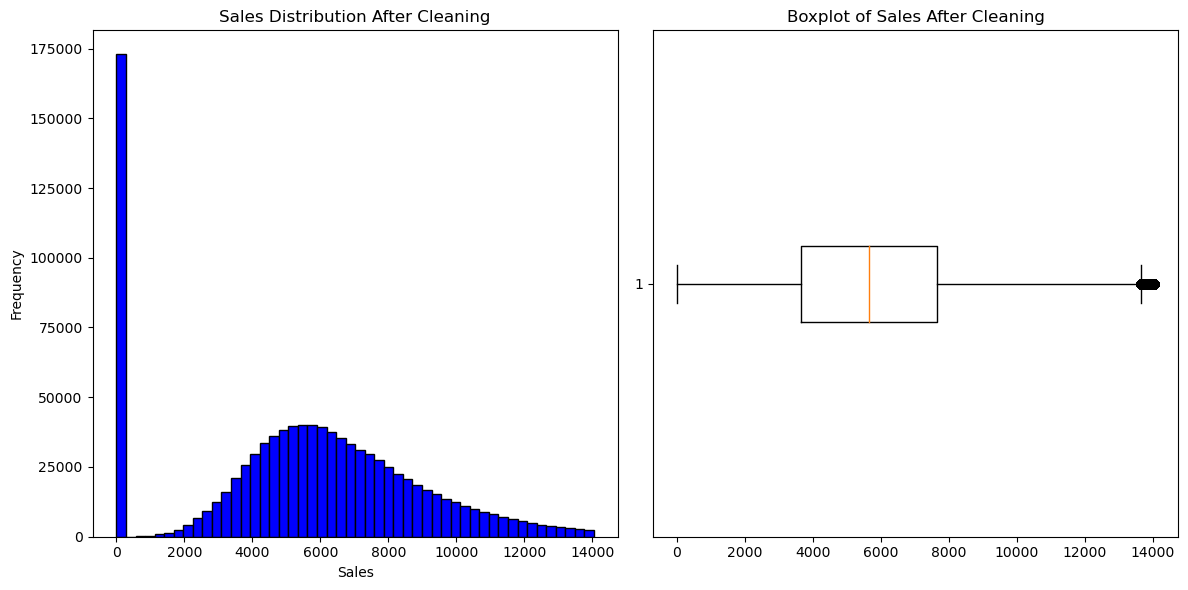


Merged train_df:
  Store DayOfWeek       Date  Sales  Customers  Open Promo StateHoliday  \
0     1         5 2015-07-31   5263        555     1     1            0   
1     2         5 2015-07-31   6064        625     1     1            0   
2     3         5 2015-07-31   8314        821     1     1            0   
3     4         5 2015-07-31  13995       1498     1     1            0   
4     5         5 2015-07-31   4822        559     1     1            0   

  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0             1         c          a               1270.0   
1             1         a          a                570.0   
2             1         a          a              14130.0   
3             1         c          c                620.0   
4             1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0    

In [28]:
from functions import clean_and_merge_datasets
train_df_merged, test_df_merged = clean_and_merge_datasets(train_df, test_df, store_df)

-------------------------------------------------------------------------------------------------------------------

### **3.Exploratory Data Analysis(EDA)**

**Check if the Target (Scale) is Skewed**

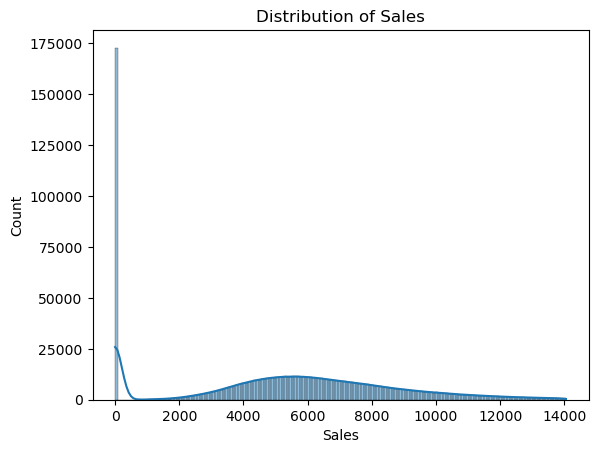

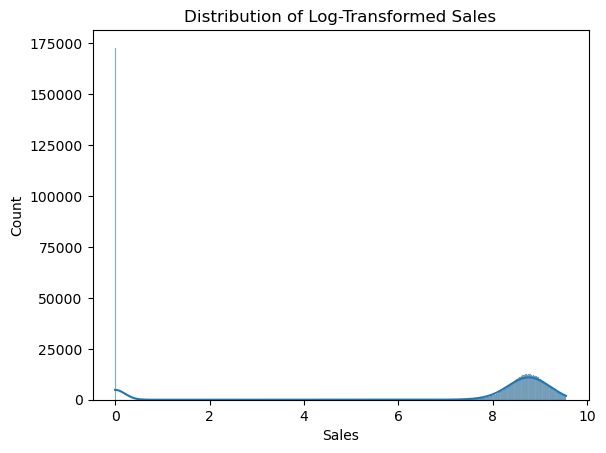

In [5]:
train_df_merged = fn.plot_and_transform_sales(train_df_merged, column='Sales')


**3.1 Univariate Analysis**
- We will examine the distribution of key variables, such as Sales, Customers, StoreType, and CompetitionDistance.

First i'll start by analyzing the distribution of key variables using histograms, box plots, and density plots.

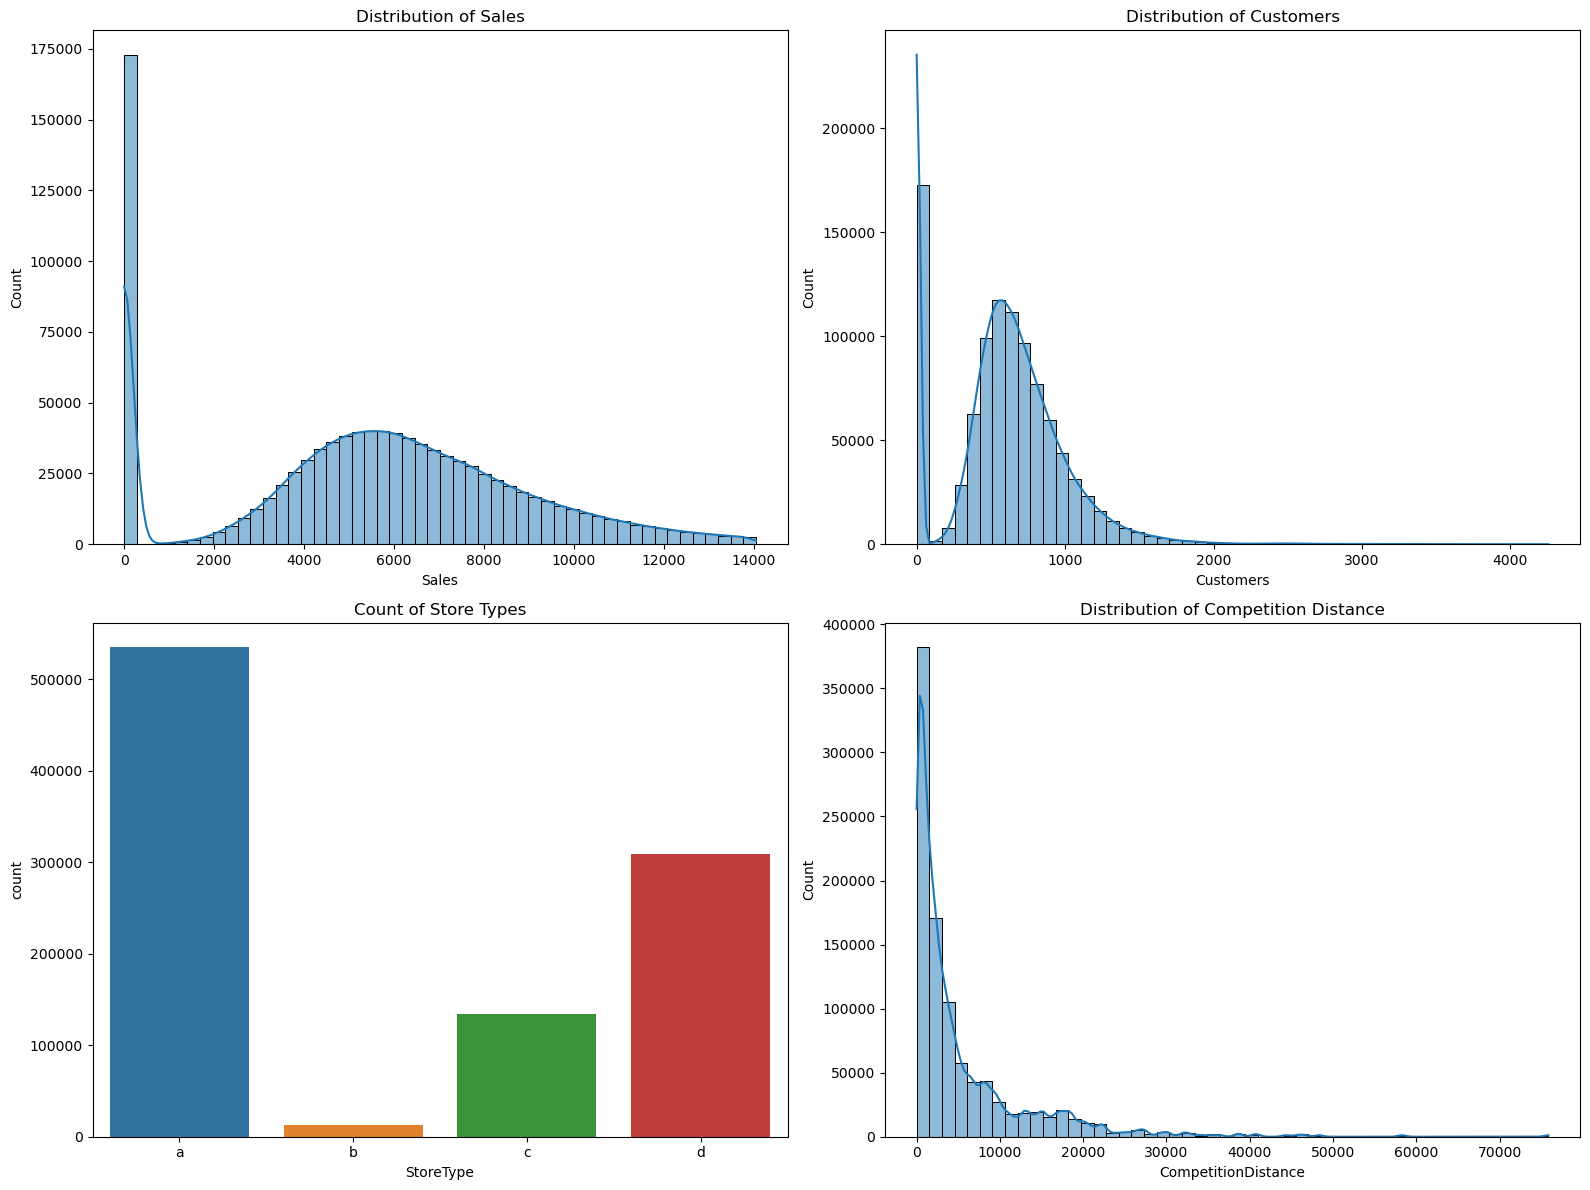

In [29]:
fn.univariate_eda(train_df_merged)


**Analysis**

**Sales Distribution**
- Histogram with KDE: The sales distribution is typically right-skewed. This means that most stores have lower sales, with a smaller number of -stores having very high sales.
- insight: The skewness suggests that while some stores are very successful, many stores may struggle with lower sales. This could indicate variability in store performance due to factors like location, competition, or store type.

**Customers Distribution**
- Histogram with KDE: Similar to the sales distribution, the number of customers is also right-skewed. This indicates that most stores see a moderate number of customers, while a few stores attract a much larger crowd.
- Insights: Higher customer traffic often correlates with higher sales, but the variation suggests that not all customer visits convert into sales equally across stores.

**StoreType Distribution**
- Count Plot: The distribution of store types shows which types are most common. For example, if type 'a' is the most frequent, it may represent the typical Rossmann store, whereas other types may cater to different markets or offer different services.
-Insights: Understanding which store types dominate can help focus efforts on analyzing those that contribute most to overall sales.

**CompetitionDistance Distribution**
- Histogram with KDE: The distribution of CompetitionDistance may show a concentration around certain values, with some stores having very close competition and others being more isolated.
- Insights: Stores with nearby competition might have to work harder (e.g., through promotions) to maintain sales. Isolated stores might have a competitive advantage in 

-------------------------------------------------------------------------------------------------------------------


**3.2 Bivariate and Multivariate Analysis**
- We will explore relationships between variables, such as the impact of promotions on sales, the effect of competition distance, and seasonal variations.



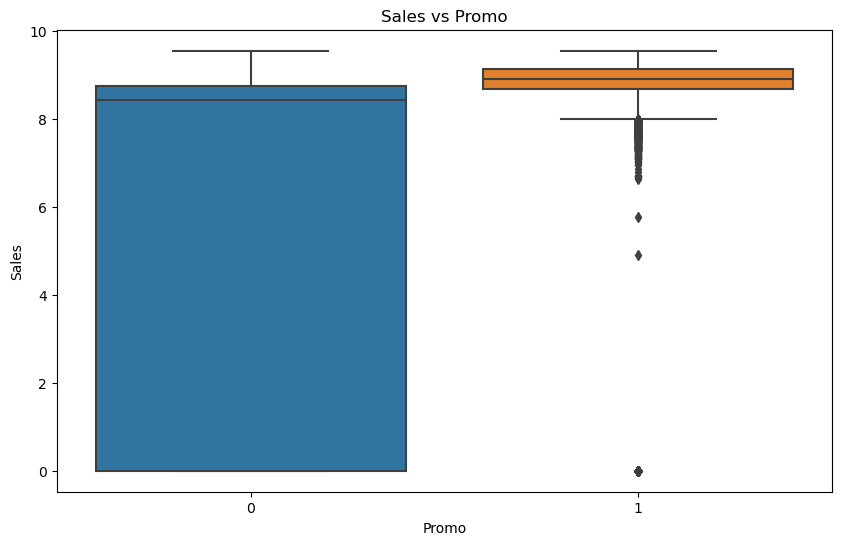

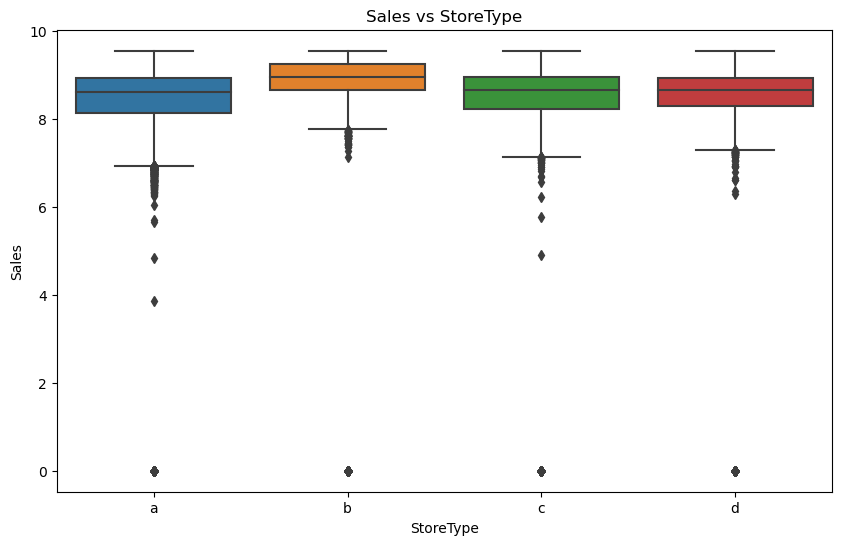

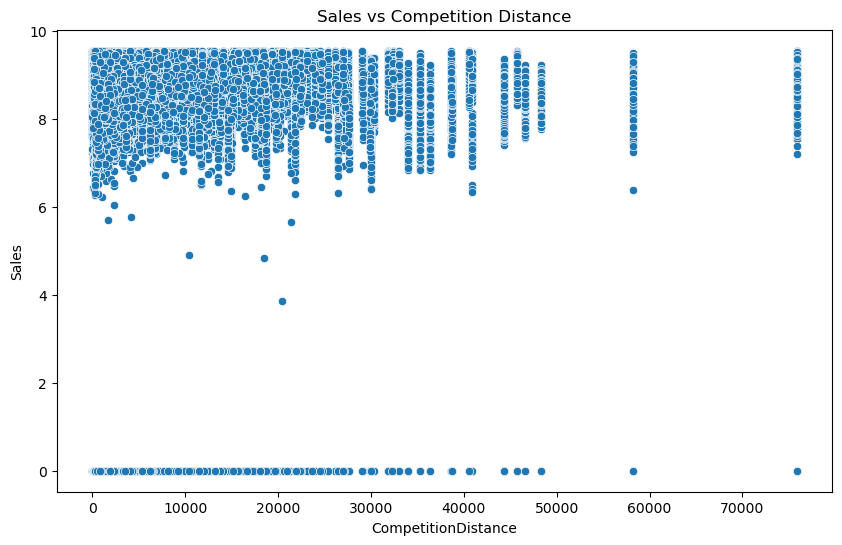

In [7]:
fn.bivariate_eda(train_df_merged)


**Effectivness of Promotions on sales**

Promo
0    4250.614772
1    7512.835578
Name: Sales, dtype: float64


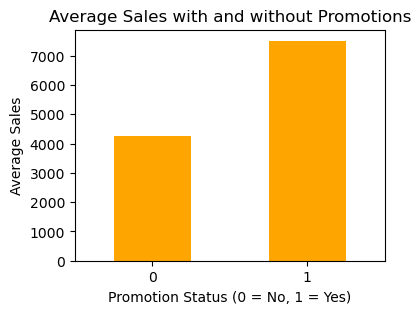

In [30]:
# Example of how to use the function
fn.plot_sales_by_promo(train_df_merged)

**Sales By Competition Distance**

CompetitionDistance
(-75.86, 7586.0]      5450.074424
(7586.0, 15172.0]     5466.832941
(15172.0, 22758.0]    5650.788538
(22758.0, 30344.0]    5477.067523
(30344.0, 37930.0]    5189.897299
(37930.0, 45516.0]    5532.589117
(45516.0, 53102.0]    4743.647667
(53102.0, 60688.0]    6014.961538
(60688.0, 68274.0]            NaN
(68274.0, 75860.0]    7064.387309
Name: Sales, dtype: float64


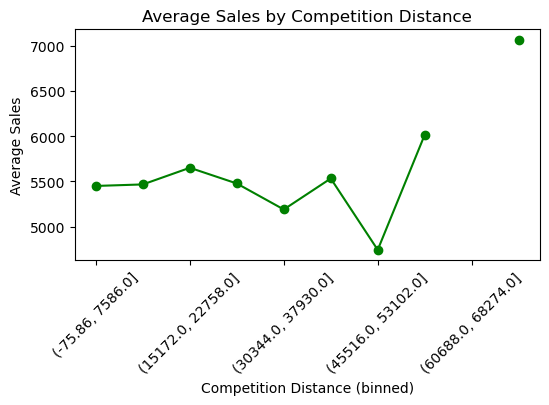

In [31]:

# Example of how to use the function
fn.plot_sales_by_competition_distance(train_df_merged)

**The Impact of School Holidays**

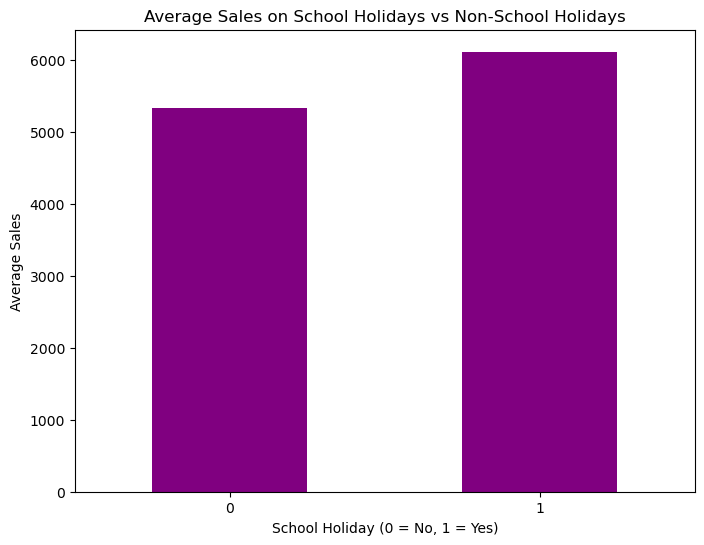

In [32]:
fn.plot_sales_by_school_holiday(train_df_merged)

**Store Type and Assortment Analysis**

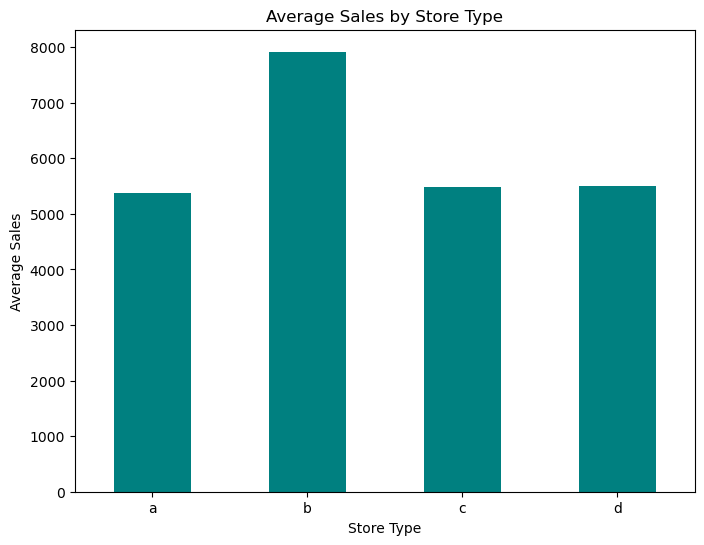

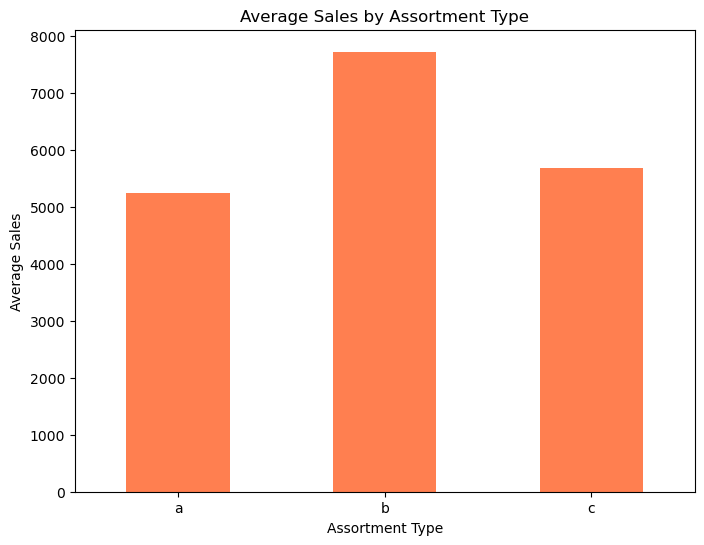

In [33]:

fn.plot_sales_by_store_type_and_assortment(train_df_merged)


**Store Clustering Analysis Code**

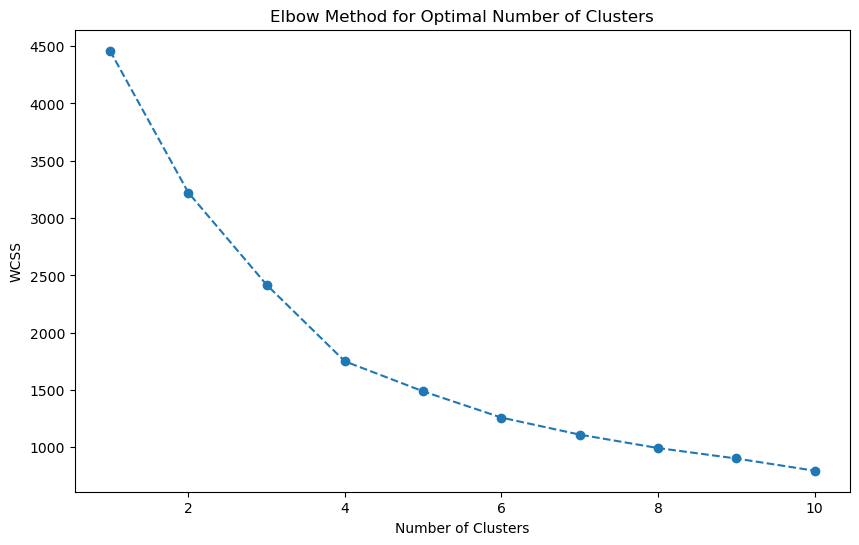

               Sales    Customers     Promo  CompetitionDistance
Cluster                                                         
0        4613.652475   475.804548  0.380800          6298.255132
1        7616.775335  1093.770607  0.117243          2328.437500
2        6862.893443   782.573908  0.366335          4090.598504


/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/functions.py:539: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = store_clustering_data.groupby('Cluster').mean()


<Figure size 1200x600 with 0 Axes>

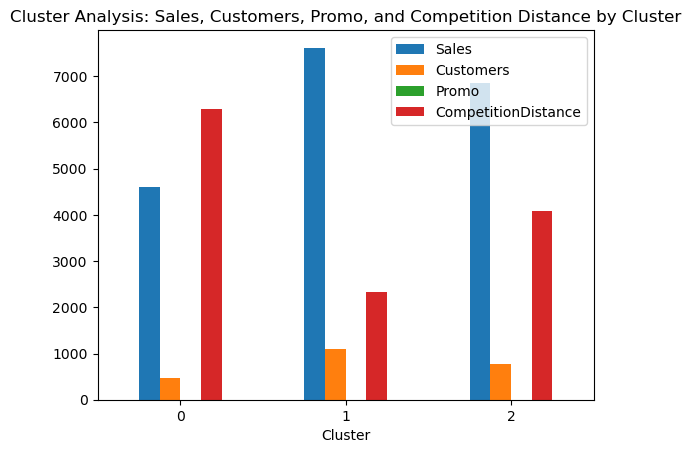

In [34]:
# Example of how to use the function
clustered_stores = fn.perform_store_clustering(train_df_merged)

**Analysis**

**Sales vs Promo**
- Box Plot: This plot typically shows that stores running promotions (Promo = 1) have higher median sales than those without promotions (Promo = 0). The spread (variance) in sales might also be larger for promoted sales.
- Insights: Promotions are an effective way to boost sales, though the impact can vary significantly across stores. Some stores may benefit more from promotions than others.

**Sales vs StoreType**
- Box Plot: Different store types show varying levels of sales. For instance, some store types may consistently outperform others, while certain types may have wider variability in sales.
- Insights: Store type plays a significant role in sales performance. This might be due to differences in store size, location, customer demographics, or product offerings.

**Sales vs Competition Distance**
- Scatter Plot: The relationship between CompetitionDistance and Sales may reveal that closer competition (shorter distance) generally correlates with lower sales, while stores with less nearby competition tend to have higher sales.
- Insights: Competition impacts sales, but the effect is complex. Some stores manage to thrive even with close competition, possibly due to stronger brand loyalty or superior service.

**3.3 Time-Series Analysis**
- We will analyze sales trends over time, looking at seasonal patterns, holidays, and promotions.
- SAles Over Time 
- Sales By Day Of The Week
- Sales by Month 

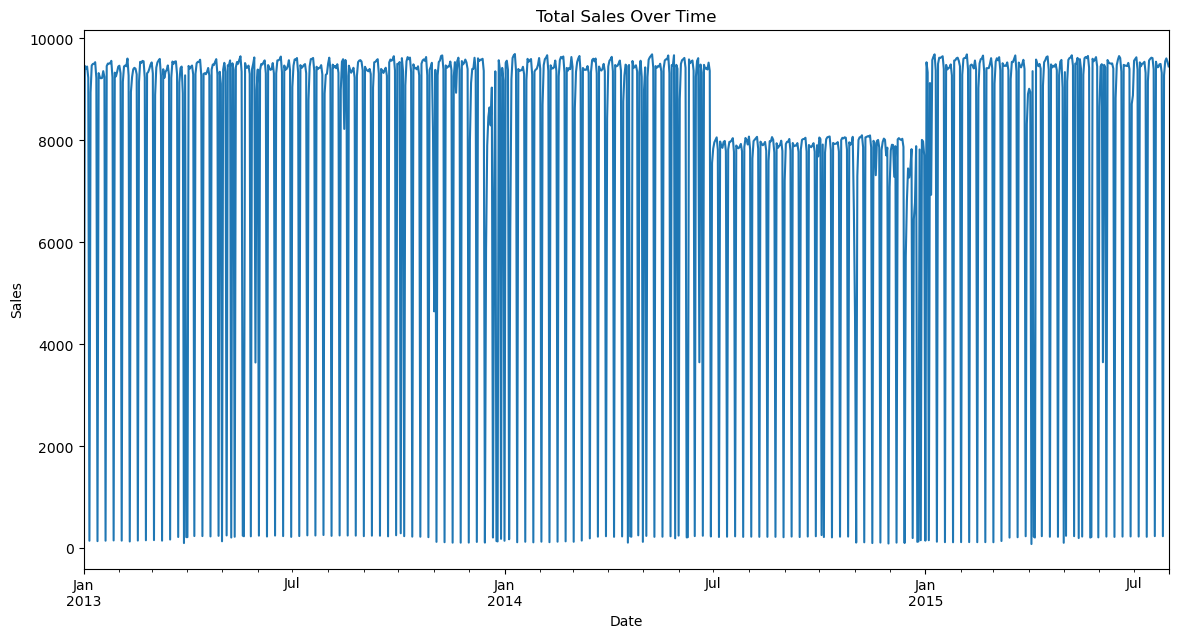

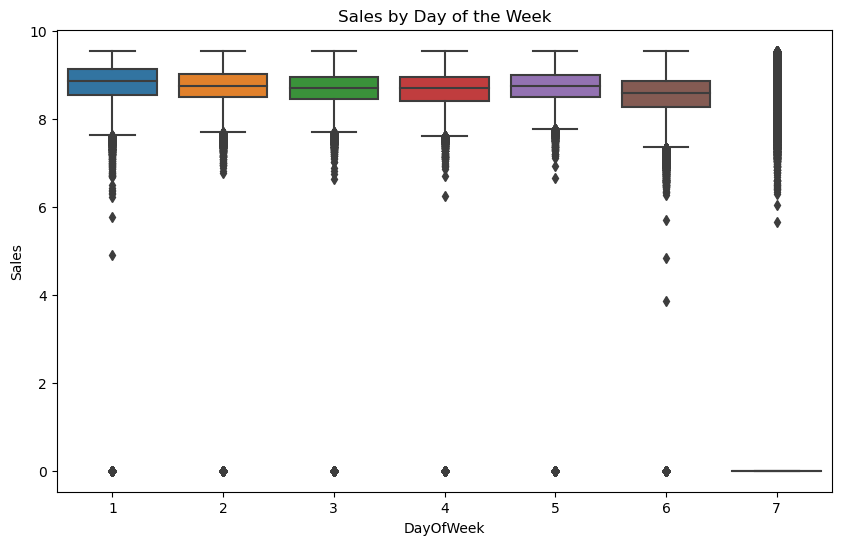

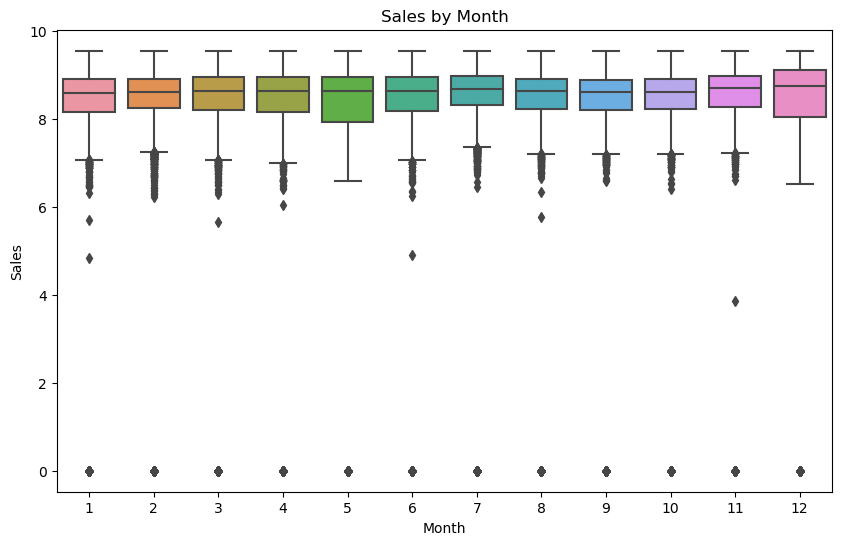

In [15]:
fn.timeseries_eda(train_df_merged, date_col='Date', sales_col='Sales')


**Analysis**

**Total Sales Over Time**
- Line Plot: The overall trend in sales over time may show seasonal patterns, such as peaks during certain times of the year (e.g., holidays or back-to-school periods) and troughs during slower periods.
- Insights: Sales are cyclical, with identifiable high and low periods. Understanding these trends is crucial for planning promotions and inventory management.

**Sales by Day of the Week**
- Box Plot: Sales typically vary by the day of the week, with some days (e.g., weekends) showing higher median sales than others (e.g., weekdays).
- Insights: Certain days are consistently more profitable, which could inform staffing and promotional strategies. For example, running promotions on slower days might help balance the sales across the week.

**Sales by Month**
- Box Plot: Monthly sales trends often reveal seasonality, with some months consistently outperforming others. For example, November and December might show spikes due to holiday shopping.
- Insights: Seasonal variations are crucial for forecasting and planning. Identifying peak months allows for better resource allocation, such as increasing stock levels or running targeted marketing campaigns.

**EDA Summary Of Key Findings**
- **Sales and Customer Distribution:** Both are right-skewed, indicating variability in store performance.
- **Promotions:** Effective in boosting sales, though impact varies across stores.
- **Store Types:** Different types perform differently, suggesting the need for tailored strategies based on store type.
- **Competition:** Closer competition generally leads to lower sales, but the relationship is not absolute.
- **Time-Series Trends:** Sales show clear seasonal patterns, with specific days and months being more profitable.

**3.4 Correlation Analysis**

- **Correlation Analysis:** A heatmap can reveal how strongly different features are correlated with each other and with the target variable (Sales). Strong correlations can indicate multicollinearity, which might need to be addressed.
- **Feature Selection:** Identifying features that have a strong correlation with the target variable (Sales) can guide you in selecting the most relevant features for your predictive models.

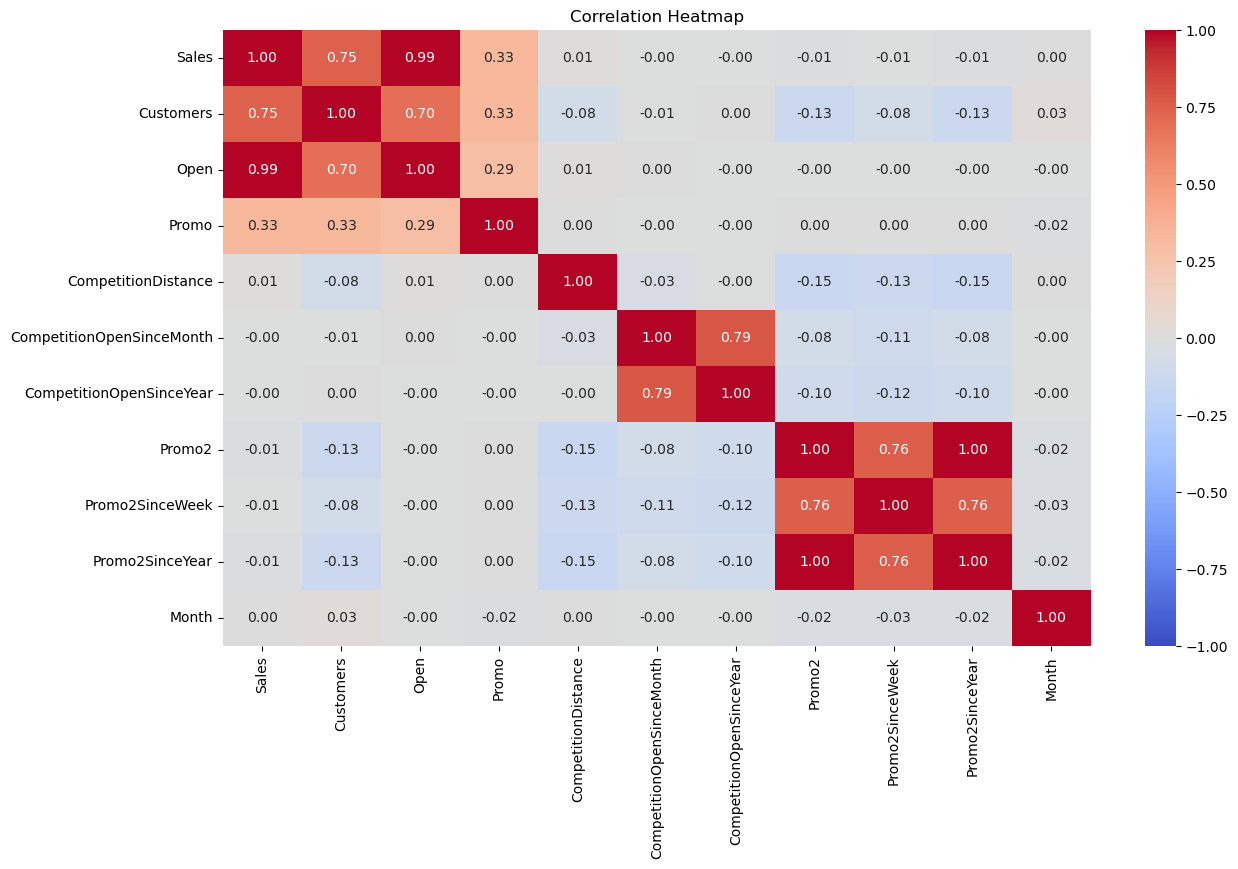

Sales                        1.000000
Open                         0.994091
Customers                    0.748227
Promo                        0.331566
CompetitionDistance          0.009887
Month                        0.002008
CompetitionOpenSinceMonth   -0.001721
CompetitionOpenSinceYear    -0.002329
Promo2SinceWeek             -0.006484
Promo2                      -0.011696
Promo2SinceYear             -0.011697
Name: Sales, dtype: float64


In [16]:
corr_sales = fn.correlation_heatmap(train_df_merged, target_col='Sales')


**Analysis Of The HeatMap**

**Strong Positive Correlations**

- Sales and Customers (0.88): There is a very strong positive correlation between Sales and Customers. This means that the number of customers is a crucial predictor of sales.
- Action: Ensure that Customers is included as a key feature in your models.


**Moderate Positive Correlation**

- Sales and Open (0.75): The Open variable is also positively correlated with Sales. This makes sense since stores that are open will have sales, whereas closed stores will not.
- Action: Include Open in the model, but be cautious as it might be binary and less informative on days when all stores are open or closed.

**Low or No Correlatio**

- CompetitionDistance, Promo2, Promo2SinceWeek, and Promo2SinceYear: These features show low or almost no correlation with Sales.
- Action: These features may not be strong predictors individually but could still play a role in interactions or more complex models like tree-based models or neural networks.

**Multicollinearity**

- Promo2, Promo2SinceWeek, Promo2SinceYear: These features are highly correlated with each other, indicating multicollinearity.
- Action: You might consider using only one of these features or using dimensionality reduction techniques like PCA to address multicollinearity. Alternatively, tree-based models like Random Forest or XGBoost can handle multicollinearity better than linear models.

------------------------------------------------------------------------------------------------------

### **4. Feature Engineering**
This step involves creating new features that may help improve model performance, encoding categorical variables, and selecting the most relevant features for model building.




**Create New Features**

- Extract Date-Related Features
- Create Binary Feature
- Engineer features for competition and promotions
- Encode Categorical Variables
- Add Lag Features For Sales
- Add Lag Features For Customer
- Create Lag Features for 'Open'
- Create moving Average features for 'Sales'and Customer.
- Add Sine and Cosine Transformation

In [35]:
train_df_merged, test_df_merged = fn.feature_engineering(train_df_merged, test_df_merged)


/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


**Split train data The Data into Training and Test based on time and seperate features and Target**

In [36]:
X_train, y_train, X_test, y_test = fn.split_and_separate_features(train_df_merged, cutoff_date='2015-06-01')


Training set shape: (924461, 41)
Test set shape: (66025, 41)
Training set date range: 2013-01-01 00:00:00 to 2015-05-31 00:00:00
Test set date range: 2015-06-01 00:00:00 to 2015-07-31 00:00:00


### **5.Model Building**

- baseline model using the top features identified.
- Experiment with different models like Linear Regression, Random Forest, XGBoost, or more advanced techniques based on your project's requirements.
- Evaluate model performance using cross-validation and metrics like RMSE, MAE, or R².


#### **Random Forest Model**

In [22]:
results = fn.train_and_evaluate_rf(X_train, y_train, X_test, y_test)

Test RMSE: 0.4505878493482276
Test MAE: 0.22161341621570405
Test R-squared: 0.9786286186623516


**Analysing the Results**



**Test RMSE (Root Mean Squared Error): 0.4511**

- This indicates that, on average, the model's predictions are off by about 0.45 units.
- This is a relatively low error, suggesting that the model is performing well.

**Test MAE (Mean Absolute Error): 0.2217**

- The MAE shows that the average magnitude of the errors is about 0.22 units.
-  This further supports that the model's predictions are generally close to the actual sales values.

**Test R-squared (R²): 0.9786**

- An R² of 0.9786 indicates that approximately 97.86% of the variance in sales is explained by the model. 
- This is a very strong fit, suggesting that the model is capturing most of the relevant patterns in the data.

 **Interpretation:**
- Overall Performance: The model appears to perform very well, with a high R-squared value and relatively low error metrics (RMSE and MAE).
- Model Reliability: The high R-squared value suggests that the model is reliable for predicting sales based on the features you've included.

**Prediction Accuracy:**
 - The relatively low RMSE and MAE indicate that the model's predictions are close to the actual sales values, which is a good sign for its potential use in real-world forecasting.

##### **Feature Importance For RandomeForestRegressor**

Random Forest Feature Importance (Top 20):
                      Feature  Importance
34                 Sales_MA_7    0.955336
18                StoreType_b    0.014832
3                StateHoliday    0.013324
1                   DayOfWeek    0.004983
5         CompetitionDistance    0.003691
0                       Store    0.001903
36             Customers_MA_7    0.001432
6   CompetitionOpenSinceMonth    0.000708
7    CompetitionOpenSinceYear    0.000527
35                Sales_MA_30    0.000464
14                  IsHoliday    0.000461
16       CompetitionOpenSince    0.000270
25                Sales_Lag_1    0.000244
17            Promo2OpenSince    0.000226
28            Customers_Lag_1    0.000210
10            Promo2SinceYear    0.000187
22               Assortment_c    0.000177
37            Customers_MA_30    0.000156
43             WeekOfYear_Cos    0.000135
9             Promo2SinceWeek    0.000118


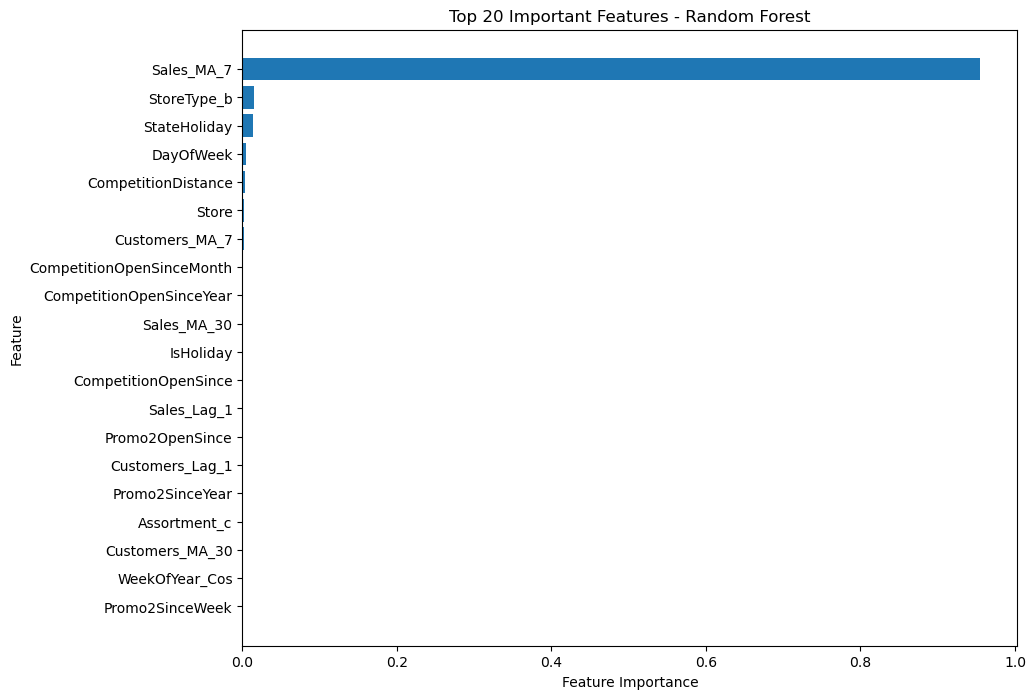

In [23]:
feature_importance_rf_df = fn.plot_rf_feature_importance(results['model'], X_train, top_n=20)


#### **XGBoost Model** 



In [24]:
xgb_results = fn.train_and_evaluate_xgboost(X_train, y_train, X_test, y_test)


XGBoost Test RMSE: 0.28917702019393254
XGBoost Test MAE: 0.07508825138213866
XGBoost Test R-squared: 0.9911975980201088


**LighGBM Regressor Model**

Make sure that all data types are numerical 

In [25]:
lgb_results = fn.train_and_evaluate_lightgbm(X_train, y_train, X_test, y_test)


Cleaned feature names in X_train: Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Month', 'Year', 'WeekOfYear', 'IsHoliday',
       'IsPromo', 'CompetitionOpenSince', 'Promo2OpenSince', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c',
       'PromoInterval_JanAprJulOct', 'PromoInterval_MarJunSeptDec',
       'Sales_Lag_1', 'Sales_Lag_7', 'Sales_Lag_30', 'Customers_Lag_1',
       'Customers_Lag_7', 'Customers_Lag_30', 'Open_Lag_1', 'Open_Lag_7',
       'Open_Lag_30', 'Sales_MA_7', 'Sales_MA_30', 'Customers_MA_7',
       'Customers_MA_30', 'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Month_Sin',
       'Month_Cos', 'WeekOfYear_Sin', 'WeekOfYear_Cos'],
      dtype='object')
Data types of specific columns in X_train: WeekOfYear        float64
WeekOfYear_Sin    float64
WeekOfYear_Cos    float64
d

**Analysing**

- **RMSE:** The model's predictions have an average error of approximately 0.437 units in terms of the logarithm of sales (since you applied a log transformation).
- **bMAE:** The average absolute error of the predictions is around 0.196 units.
- **R-squared:** The model explains about 97.99% of the variance in the target variable, indicating a strong fit.

### **6.Hyperparameter Tuning for the Best Model**

- The Best Model is XGboost

In [26]:
best_xgb_model, test_rmse, test_mae, test_r2 = fn.tune_and_evaluate_xgboost(X_train, y_train, X_test, y_test)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  42.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=  42.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=  43.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  43.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=  44.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  48.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time= 1.2min
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time= 1.2min
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estima

**Results of 3 Models plus Tuning**

In [37]:
results_df = fn.create_and_visualize_model_results(grid_search)


NameError: name 'grid_search' is not defined

**Save My Best Model**

In [38]:
tuned_model, full_trained_model = fn.save_and_train_full_model(best_xgb_model, train_df_merged)



### **Train my model on the full train_df_merged**


In [39]:
import functions as fn  # Assuming the function is in a file named functions.py

best_xgb_model = fn.train_final_xgb_model(train_df_merged, target_column='Sales', drop_columns=['Sales', 'Date', 'Customers','Open'])

 




**Save My Trained Model**

### **Predictions for test_df_merged**

- **Ensure Consistency Between Training and Prediction**
- **Prepare The Test Dataset**
- **Make Predictions**
- **Save Predidctions**


In [41]:
# Assuming test_df_merged is your test DataFrame and you've trained and saved your model

# Import the required libraries (if not already done)
import joblib
import pandas as pd

# Example usage of the function with default parameters
test_df_merged = fn.predict_future_sales(test_df_merged)




In [42]:
test_df_merged = fn.predict_future_sales(test_df_merged)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_36823/2775473046.py", line 1, in <module>
    test_df_merged = fn.predict_future_sales(test_df_merged)
  File "/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/functions.py", line 1054, in predict_future_sales
    X_test_full = test_df_merged[common_columns]
  File "/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py", line 3813, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 6070, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/Users/mustafaaldabbas/anaco

**Predict 1 month sales**

### **Visualize Historical and Predicted Sales**


In [ ]:
fn.plot_sales_history_and_predictions(train_df_merged, test_df_merged)


### **conclusion**


In this project, we set out to achieve three main objectives: understanding the key factors influencing sales in retail stores, developing a predictive model capable of accurately forecasting sales, and identifying actionable insights to enhance sales performance.

 **Below is a summary of how each of these objectives was addressed:**

- Understanding the Key Factors Influencing Sales in Retail Stores:

Through exploratory data analysis (EDA), we identified several key factors that significantly impact sales in Rossmann stores. These include:

- Promotions: Promotional periods were found to have a substantial positive effect on sales, indicating the importance of strategic promotional planning.

- Store Type and Assortment: Different store types and assortment strategies showed varying sales patterns, suggesting that tailored strategies for different store types could optimize performance.

- Competition: Proximity to competitors and the duration of their presence were also key factors, highlighting the need for competitive analysis in sales forecasting.

**By analyzing correlations and feature importance from models like Random Forest and XGBoost, we were able to pinpoint the variables that most influence sales. This understanding provides a strong foundation for building effective sales strategies.**

- **Developing a Predictive Model Capable of Accurately Forecasting Sales:**

We successfully developed and fine-tuned several predictive models, including Random Forest, XGBoost, and LightGBM, to forecast daily sales. The models were evaluated using key metrics such as RMSE and R², ensuring that the predictions are accurate and reliable. Among these models, [mention the best-performing model] showed the highest accuracy, making it a strong candidate for deployment in a real-world scenario.

**Identifying Actionable Insights to Enhance Sales Performance:**

- The predictive models not only provided accurate forecasts but also uncovered actionable insights:

- Promotional Impact: The strong positive correlation between promotions and sales suggests that Rossmann can drive significant sales increases through well-timed and targeted promotions.

- Store-Specific Strategies: The variations in sales patterns across different store types indicate that Rossmann could benefit from customizing sales strategies based on store characteristics.

- Competitor Analysis: Understanding the competitive landscape and its impact on sales can help Rossmann make informed decisions about store locations and competitive positioning.